In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sn


!pip install plotly
import plotly as pl
import plotly.express as px
import sys
print(sys.path)

['F:\\FHNW\\krankenkassechallenge\\pca', 'C:\\Users\\bruno\\anaconda3\\python38.zip', 'C:\\Users\\bruno\\anaconda3\\DLLs', 'C:\\Users\\bruno\\anaconda3\\lib', 'C:\\Users\\bruno\\anaconda3', '', 'C:\\Users\\bruno\\anaconda3\\lib\\site-packages', 'C:\\Users\\bruno\\anaconda3\\lib\\site-packages\\locket-0.2.1-py3.8.egg', 'C:\\Users\\bruno\\anaconda3\\lib\\site-packages\\win32', 'C:\\Users\\bruno\\anaconda3\\lib\\site-packages\\win32\\lib', 'C:\\Users\\bruno\\anaconda3\\lib\\site-packages\\Pythonwin', 'C:\\Users\\bruno\\anaconda3\\lib\\site-packages\\IPython\\extensions', 'C:\\Users\\bruno\\.ipython']


# PCA with sklearn and factorized data

In [52]:
#Standardize

data = pd.read_csv("krankenkasse-mit-pbf.csv", sep = ";", names = ['age', 'sex', 'bmi', 'children', 'smoker', 'canton', "pbf", 'charges'])
data = data.iloc[1:]

data['charges'] = data['charges'].str.replace("’", "").apply(pd.to_numeric)
data['pbf'] = data['pbf'].apply(pd.to_numeric)
data['bmi'] = data['bmi'].apply(pd.to_numeric)
data['age'] = data['age'].apply(pd.to_numeric)
data['children'] = data['children'].apply(pd.to_numeric)

# Encode categorical variables.
data["sex"] = pd.factorize(data['sex'])[0]
data["smoker"] = data["smoker"].apply(lambda x: x=="ja")

data['canton'] = pd.factorize(data['canton'])[0]

# Remove encoded categorical variables.

# 1 record with negative percentage of body fat.
data = data[data["pbf"]>0]

data.head()

,age,sex,bmi,children,smoker,canton,pbf,charges
1,19,0,24.720,0,True,0,35.94,4253
2,18,1,29.416,1,False,1,26.86,2494
3,28,1,28.800,3,False,1,26.92,3138
4,33,1,20.564,0,False,2,7.98,1553
5,32,1,25.504,0,False,2,21.84,2768


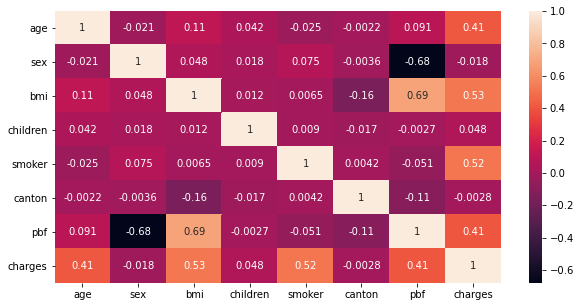

In [53]:
corrMatrix = data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

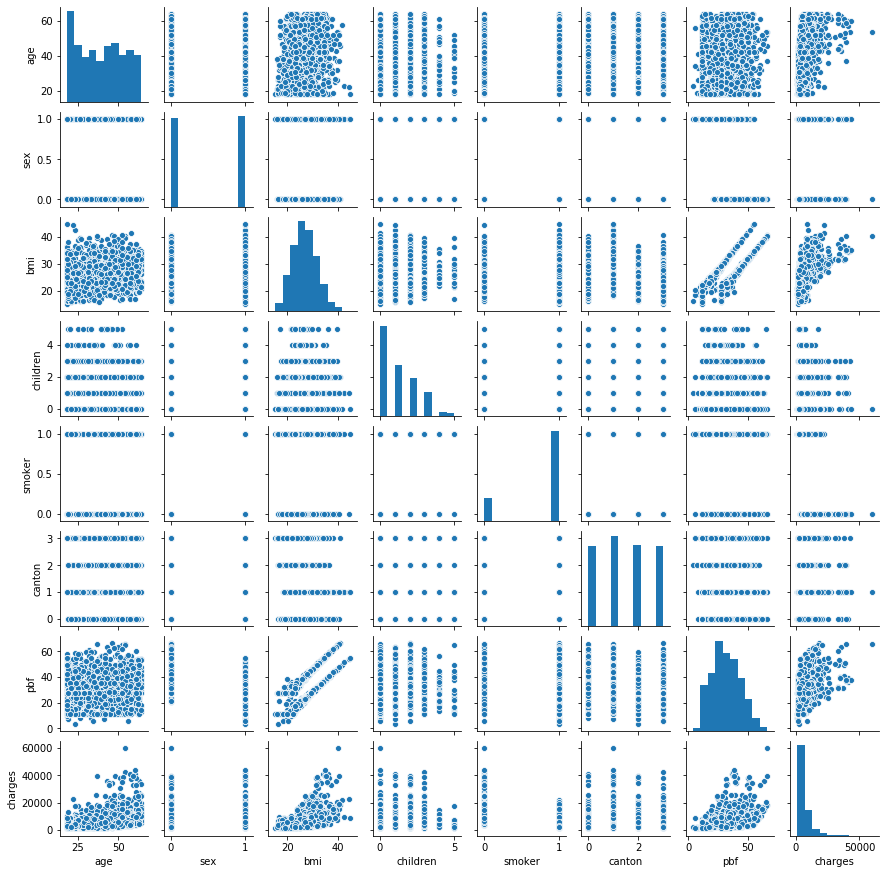

In [4]:
sn.pairplot(data, height=1.5)

### Standardize data with Standardscaler

In [70]:
features_without_charges = ['age', 'bmi', 'sex', 'pbf', 'children', 'smoker', 'canton']
features = ['charges', 'age', 'bmi', 'sex', 'pbf', 'children', 'smoker', 'canton']


x = data.loc[:, features_without_charges].values
y = data.loc[:, ['charges']].values
x = StandardScaler().fit_transform(x)
x
pd.DataFrame(data = x, columns = features_without_charges).head()

,age,bmi,sex,pbf,children,smoker,canton
0,-1.438295,-0.455136,-1.009771,0.353769,-0.909234,1.974192,-1.345316
1,-1.509470,0.508698,0.990324,-0.403891,-0.079442,-0.506536,-0.439632
2,-0.797722,0.382267,0.990324,-0.398884,1.580143,-0.506536,-0.439632
3,-0.441848,-1.308138,0.990324,-1.979288,-0.909234,-0.506536,0.466051
4,-0.513023,-0.294223,0.990324,-0.822773,-0.909234,-0.506536,0.466051


### Let's calcualte the principal components using PCA() 

(1337, 7)


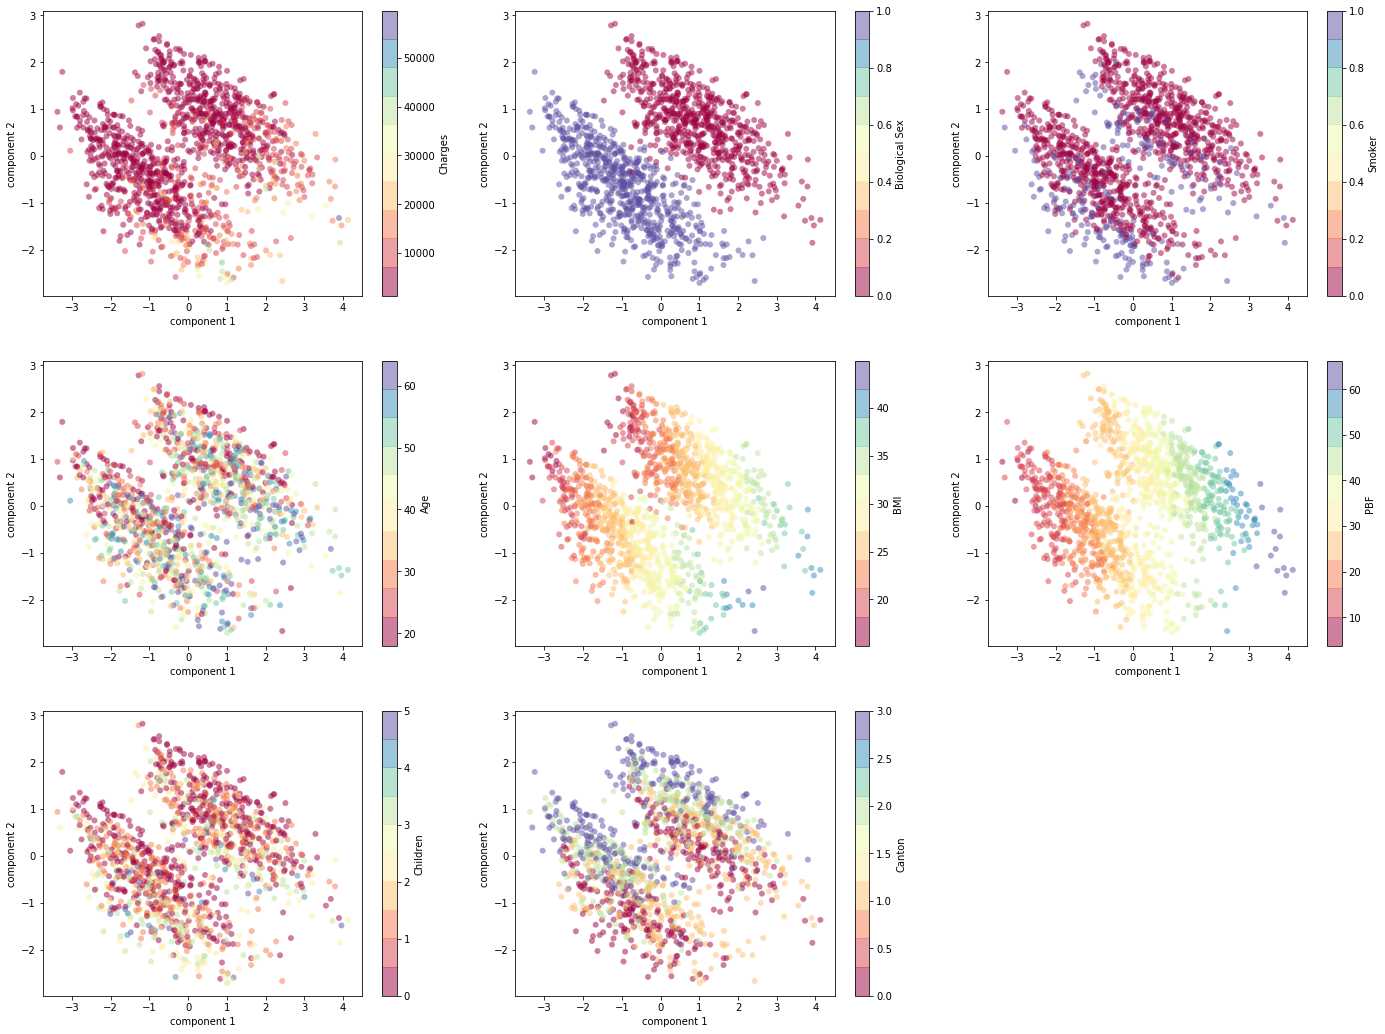

In [71]:
pca = PCA(7)
print(x.shape)
projected = pca.fit_transform(x)

PCs = pca.components_
plt.rcParams["figure.figsize"] = (20,15) 
plt.subplot(3, 3, 1)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.charges, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Charges");

plt.subplot(3, 3, 2)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.sex, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Biological Sex");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 3)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.smoker, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Smoker");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 4)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.age, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Age");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 5)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.bmi, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "BMI");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 6)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.pbf, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "PBF");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 7)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.children, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Children");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 8)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.canton, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Canton");
plt.tight_layout(pad=3)

plt.show()

Die obigen Plots sind PCA plots von den ersten zwei Principal Components ohne Charges in der Berechnung. Im ersten Plot sind die Charges color-coded und man sieht kein Muster. Das markannteste Muster erkennt man beim biologischen Geschlecht. Sie machen die grösste Varianz aus in den Daten. BMI und PBF sehen sehr ähnlich aus. Raucher und Nicht-Raucher haben auch eine mehr oder weniger klare Abtrennung.

In [72]:
print(pca.explained_variance_ratio_)

[0.28439062 0.16612688 0.14706784 0.14082397 0.1379832  0.12235062
 0.00125688]


Die nächsten Plots sind PCA plots der ersten zwei Principal Components mit Charges in der Berechnung. Wir können nun die grosse Differenzen sehen in den Charges im ersten Plots, wo die Charges color-coded wurden. Es sieht so aus, als hätte es eine Art lineare Beziehung in diesem heruntergebrochenen 2D Raum mit 3 Cluster. Die restlichen Plots sind jeweils mit anderen Features color-coded. Auch dort könnte man Kategorien oder Cluster ausmachen (3-5) (needs further thought).

      charges  age     bmi  sex    pbf  children  smoker  canton
1        4253   19  24.720    0  35.94         0    True       0
2        2494   18  29.416    1  26.86         1   False       1
3        3138   28  28.800    1  26.92         3   False       1
4        1553   33  20.564    1   7.98         0   False       2
5        2768   32  25.504    1  21.84         0   False       2
...       ...  ...     ...  ...    ...       ...     ...     ...
1334     5767   50  27.176    1  23.02         3   False       2
1335     2547   18  27.936    0  42.18         0   False       3
1336     3026   18  31.880    0  49.59         0   False       1
1337     2208   21  23.040    0  31.18         0   False       0
1338    19007   61  25.656    0  38.63         0    True       2

[1337 rows x 8 columns]


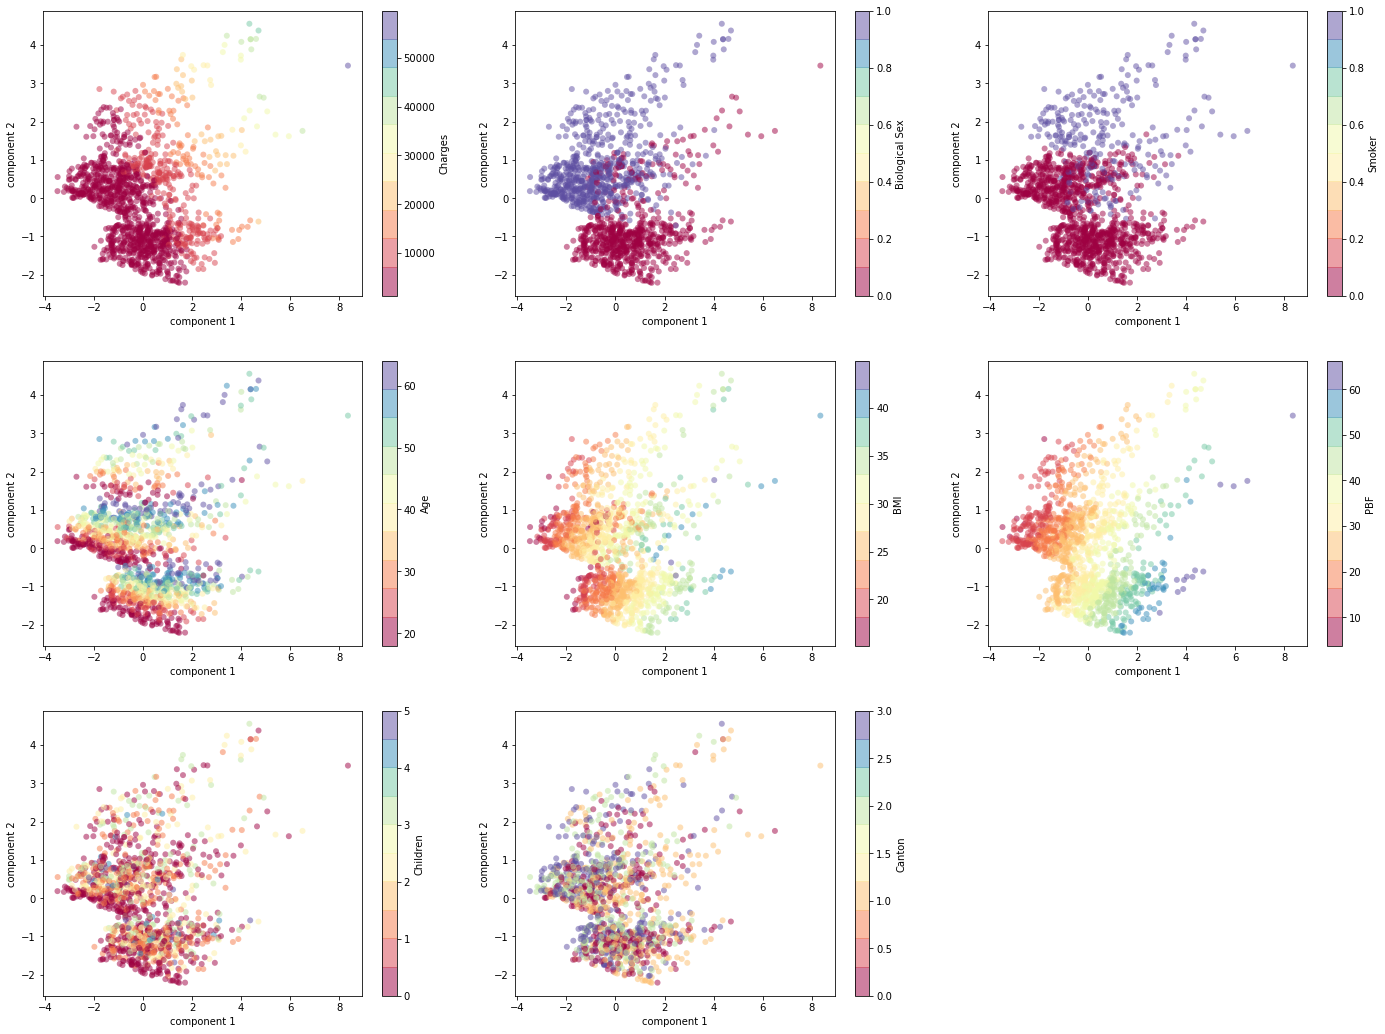

In [73]:
pca = PCA(8)
x = data.loc[:, features].values
print(data.loc[:, features])
x = StandardScaler().fit_transform(x)
projected = pca.fit_transform(x)

PCs = pca.components_
plt.rcParams["figure.figsize"] = (20,15) 
plt.subplot(3, 3, 1)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.charges, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Charges");

plt.subplot(3, 3, 2)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.sex, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Biological Sex");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 3)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.smoker, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Smoker");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 4)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.age, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Age");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 5)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.bmi, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "BMI");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 6)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.pbf, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "PBF");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 7)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.children, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Children");
plt.tight_layout(pad=3)

plt.subplot(3, 3, 8)
plt.scatter(projected[:, 0], projected[:, 1],
            c=data.canton, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar(label = "Canton");
plt.tight_layout(pad=3)

plt.show()

### What's the explained variance?

In [74]:
print(pca.explained_variance_ratio_)

[0.29346514 0.19016417 0.13533824 0.1286324  0.12165913 0.10712267
 0.0225423  0.00107595]


Die Explained Variance Ratio zeigt, dass mehrere Features ähnliche Auswirkung auf die Varianz der ganzen Daten haben. Die schwächsten Komponenten kommen sehr wahrscheinlich vom Kanton und der Anzahl Kinder.

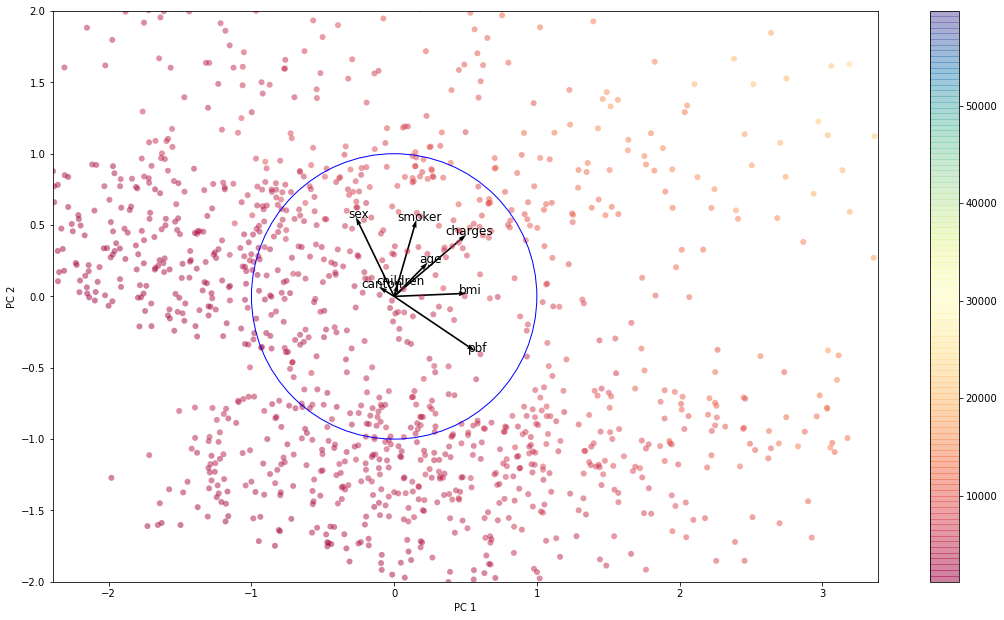

In [75]:
# Use quiver to generate the basic plot
fig = plt.figure(figsize=(6,3))

#vectors
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
    PCs[0,:], PCs[1,:], 
    angles='xy', scale_units='xy', scale=1, width=0.002 )

# Add labels based on feature names (here just numbers)
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, features):
    plt.text(j, i, z, ha='center', va='center', fontsize = "large")

plt.scatter(projected[:, 0], projected[:, 1],
            c=data.charges, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 100))
# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-2.0,3.0])
plt.ylim([-2.0,2.0])

# Label axes
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.colorbar();
fig.set_size_inches(18.5, 10.5)
fig.savefig('test2png.png', dpi=100)
plt.show()

Im obigen Plot sind die ersten zwei Principal Components geplotted. Die Eigenvektoren kommen aus dem Ursprung. Alter, children und smoker sind stark mit den Charges korelliert.  

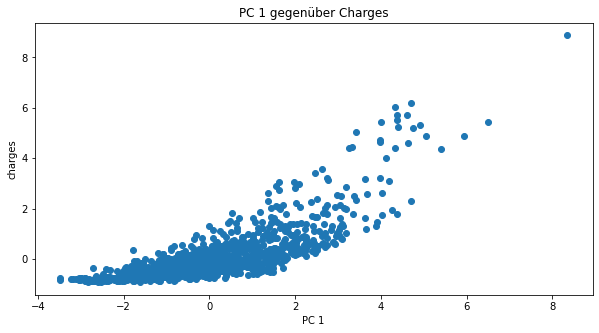

In [50]:
data_pca = pca.transform(x)

plt.rcParams["figure.figsize"] = (10,5)
plt.scatter(x = data_pca[:,0], y = x[:,0])
plt.xlabel('PC 1') and plt.ylabel('charges')
plt.title("PC 1 gegenüber Charges")
plt.show()

Der erste Principal Component hat schon eine exponentielle bis zu linearen Beziehung zu den Charges.

## Metriken in PCA

- Korrelation zeigen

#TODO Manual computation of eigenvalues:

In [48]:
n_samples = x.shape[0]
# We center the data and compute the sample covariance matrix.
x -= np.mean(x, axis=0)
cov_matrix = np.dot(x.T, x) / n_samples
print("Eigenwerte:")
for eigenvector in pca.components_:
    print(np.dot(eigenvector.T, np.dot(cov_matrix, eigenvector)))

Eigenwerte:
2.3477210962790442
1.521313377782267
1.0827059363143392
1.0290591999620955
0.9732730172388802
0.8569813673611678
0.18033841338945816
0.008607591672745349


Even easier with np.linalg.eig of covariance matrix:

In [49]:
centered_matrix = x - x.mean(axis=1)[:, np.newaxis]
cov = np.dot(centered_matrix, centered_matrix.T)
eigvals, eigvecs = np.linalg.eig(cov)

x

array([[-0.40895569, -1.43829473, -0.45513613, ..., -0.90923416,
        -1.97419247, -1.34531604],
       [-0.7035418 , -1.50946951,  0.50869838, ..., -0.07944162,
         0.50653623, -0.43963248],
       [-0.59568879, -0.79772176,  0.38226694, ...,  1.58014347,
         0.50653623, -0.43963248],
       ...,
       [-0.61444583, -1.50946951,  1.01442416, ..., -0.90923416,
         0.50653623, -0.43963248],
       [-0.75143926, -1.29594518, -0.79994915, ..., -0.90923416,
         0.50653623, -1.34531604],
       [ 2.06195021,  1.5510458 , -0.26302601, ..., -0.90923416,
        -1.97419247,  0.46605108]])